# Домашнее задание 7.2

In [15]:
import numpy as np
import matplotlib.pyplot as plt

**Задача 1** -  Решите линейную систему:
$$\begin{pmatrix}
1&2&3\\
4&0&6\\
7&8&9
\end{pmatrix} \cdot X = \begin{pmatrix}
12\\
2\\
1
\end{pmatrix}$$

In [18]:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
B = np.array([12, 2, 1])
np.linalg.solve(A, B)

array([-9.2       ,  0.9       ,  6.46666667])

**Задача 2** - Найдите псевдорешение: 
$$\begin{cases}
x + 2y – z = 1\\
3x – 4y = 7\\
8x – 5y + 2z = 12\\
2x – 5z = 7\\
11x +4y – 7z = 15
\end{cases}$$

In [19]:
A = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, -5, 0], [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15])
np.linalg.lstsq(A, B)

/Users/artur/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


(array([ 1.15601029, -0.889718  , -0.85029782]),
 array([0.66772534]),
 3,
 array([14.89650167, 10.4695886 ,  2.73531577]))

Псевдорешение: 
$$\begin{cases}
x = 1.15601029\\
y = -0.889718\\
z = -0.85029782
\end{cases}$$
Проверим:

In [21]:
np.dot(A, [ 1.15601029, -0.889718  , -0.85029782])

array([ 0.22687211,  7.02690287, 11.99607668,  6.76061058, 15.10932593])

**Задача 3** -  Сколько решений имеет линейная система:
$$\begin{pmatrix}
1&2&3\\
4&5&6\\
7&8&9
\end{pmatrix} \cdot X = \begin{pmatrix}
12\\
2\\
1
\end{pmatrix}$$
Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее.

In [49]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[12], [2], [1]])
# Вычислим детерминант А
np.linalg.det(A)

0.0

Детерминант = 0 -> система не совместна.
Вычислим ранг матрицы основной и расширенной.

In [50]:
C = np.concatenate((A, B), axis=1)
print(C)
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)

[[ 1  2  3 12]
 [ 4  5  6  2]
 [ 7  8  9  1]]


(2, 3)

Ранг расширенной матрицы больше ранга исходной матрицы, поэтому система не имеет решений.

In [51]:
# Изменим вектор В так, чтобы система имела решения
B = np.array([[3], [2], [1]])
C = np.concatenate((A, B), axis=1)
print(C)
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)

[[1 2 3 3]
 [4 5 6 2]
 [7 8 9 1]]


(2, 2)

Ранг исходной матрицы равен рангу расширенной и меньше числа неизвестных -> систма имеет бесконечное множество решений

**Задача 4** - Вычислите LU-разложение матрицы:
$$\begin{pmatrix}
1&2&3\\
2&16&21\\
4&28&73
\end{pmatrix}$$
После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.

In [52]:
import scipy 
import scipy.linalg

In [58]:
A = np.array([ [1, 2, 3], [2, 16, 21], [4, 28, 73]])
P, L, U = scipy.linalg.lu(A)
print(P)
print(L)
print(U)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


In [59]:
B = np.array([3, 2, 1])
np.linalg.solve(np.dot(P, np.dot(L, U)), B)

array([ 3.72685185, -0.18287037, -0.12037037])

In [57]:
# Проверим решение через исходную матрицу
np.linalg.solve(A, B)

array([ 3.72685185, -0.18287037, -0.12037037])

**Задача 5** - Найдите нормальное псевдорешение недоопределенной системы:
$$\begin{cases}
x + 2y - z = 1\\
8x - 5y + 2z = 12
\end{cases}$$

In [63]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

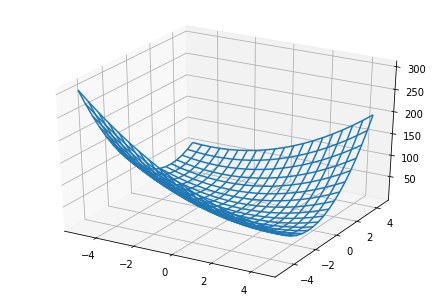

/Users/artur/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

In [68]:
A = np.array([[1, 2, -1], [8, -5, 2]])
B = np.array([1, 12])

def Q(x, y, z):
    return (x**2 + y**2 + z**2)

fig = figure()
ax = Axes3D(fig)
X = np.arange(-5, 5, 0.5)
Y = np.arange(-5, 5, 0.5)
X, Y = np.meshgrid(X, Y)
ax.plot_wireframe(X, Y, Q(X, Y, X + 2 * Y - 1))
show()
np.linalg.lstsq(A, B)

**Задача 6** - Найдите одно из псевдорешений вырожденной системы:
$$\begin{pmatrix}
1&2&3\\
4&5&6\\
7&8&9
\end{pmatrix} \cdot X = \begin{pmatrix}
2\\
5\\
11
\end{pmatrix}$$
Попробуйте также отыскать и нормальное псевдорешение.

In [70]:
# Выполняем QR-разложение
A = np.array([ [1, 2, 3], [4, 5, 6], [7, 8, 9] ])
B = np.array([2, 5, 11])
Q, R = np.linalg.qr(A)

print(A)
print(Q)
print(R)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -8.88178420e-16]]


In [71]:
# Выделяем матрицу R1
R1 = R[:2, :2]
R1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [72]:
# Аналогично выделяем матрицу B1 из правой части
B1 = np.dot(np.transpose(Q), B)[:2]
B1

array([-1.21860576e+01,  3.55271368e-15])

In [73]:
# Вычисляем X1 
X1 = np.linalg.solve(R1, B1)
X1

array([1.50000000e+00, 3.92767275e-15])

In [74]:
# Добавив к нему  X2 = 0, получаем псевдорешение системы и норму вектора
X = np.append(X1, 0)
print (X)
np.linalg.norm(X)

[1.50000000e+00 3.92767275e-15 0.00000000e+00]


1.499999999999996

In [75]:
# Вычисляем норму невязки
np.linalg.norm(np.dot(A, X) - B)

1.224744871391589

Найдем нормальное псевдорешение

![](photo_2020-04-22_10-22-42.jpg)

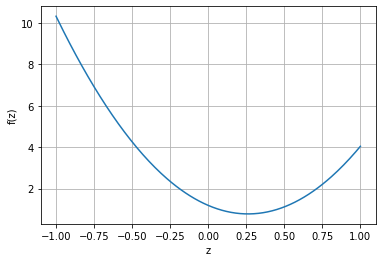

In [95]:
def Q(x, y, z):
    return (x**2 + y**2 + z**2)

z = np.linspace(-1, 1, 201)
plt.plot(z, Q((3 + 7 * z) / 7, 1 - 2 * z, z))
plt.xlabel('z')
plt.ylabel('f(z)')
plt.grid(True)
plt.show()

In [96]:
X = np.array([(3 + 7 * 0.25) / 7, 1 - 2 * 0.25, 0.25])
np.linalg.norm(X),  np.linalg.norm(np.dot(A, X) - B) 

(0.879180973220798, 1.7670452681218547)

Норма невязки не сошлась. Не могу понять почему.